<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd

Gamma correction pada citra
---------------------------
Masukkan nilai gamma: 3


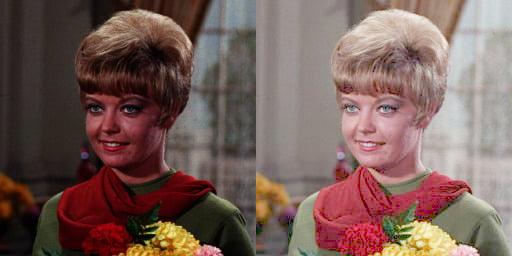

In [3]:
from typing import final
print('Gamma correction pada citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

# Fungsi untuk menerapkan gamma correction
def gamma_correction(image, gamma):
    # Membuat lookup table untuk setiap nilai piksel (0 - 255)
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan gamma correction menggunakan lookup table
    return cv2.LUT(image, table)

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/female.jpg')

# Menerapkan gamma correction
adjusted_image = gamma_correction(image, gamma)

# Menampilkan gambar asli dan hasil gamma correction
final_image = np.hstack([image, adjusted_image])
cv2_imshow(final_image)

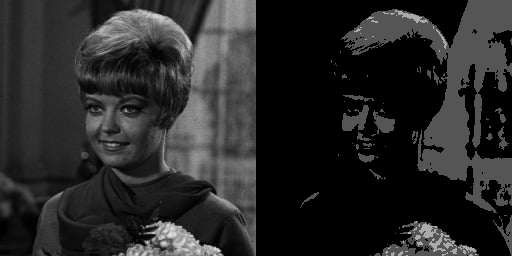

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv2.imread('/content/drive/MyDrive/PCVK/female.jpg', cv2.IMREAD_GRAYSCALE)
depth_image = np.floor_divide(original, level) * level
combined_image = np.hstack([original, depth_image])
cv2_imshow(combined_image)

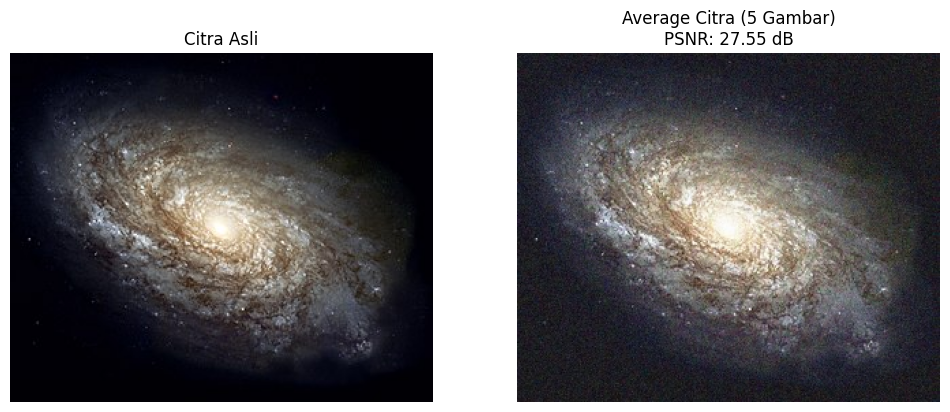

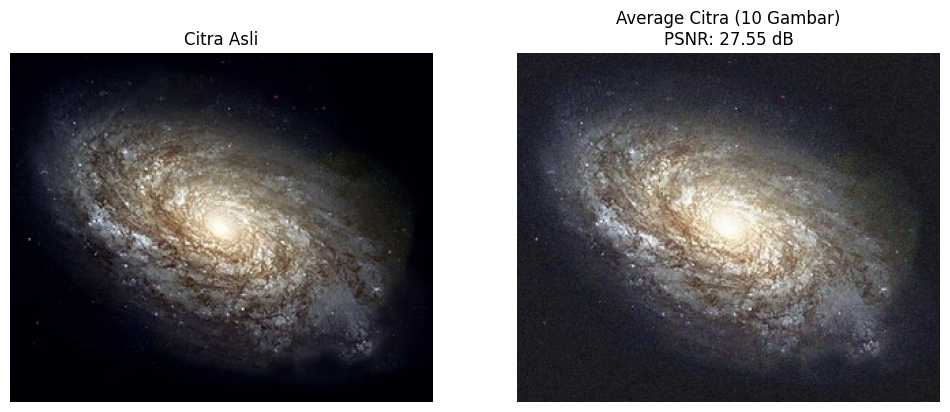

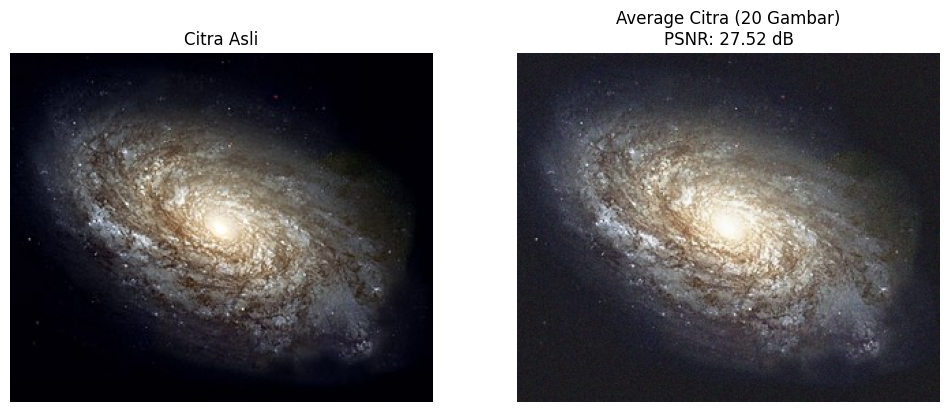

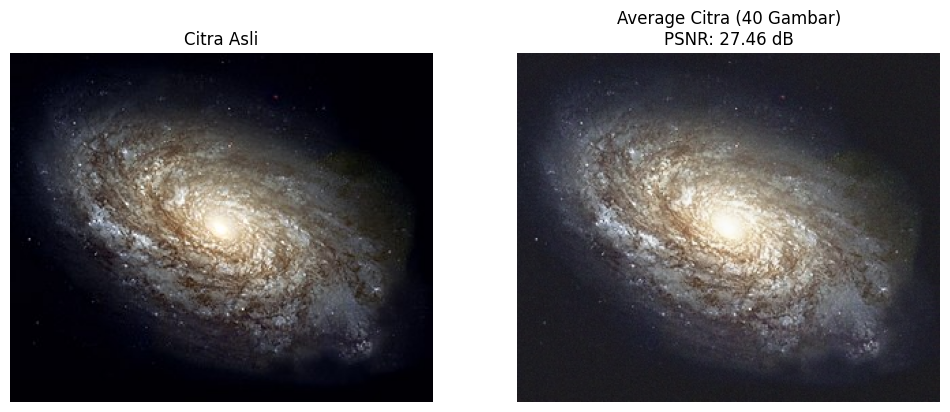

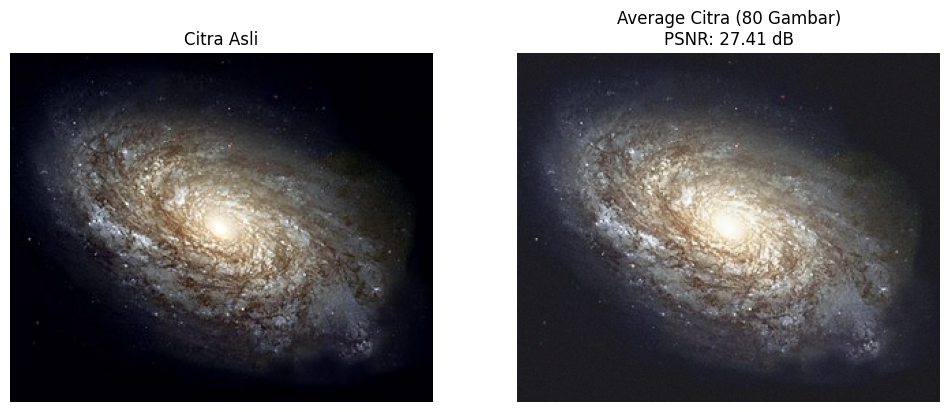

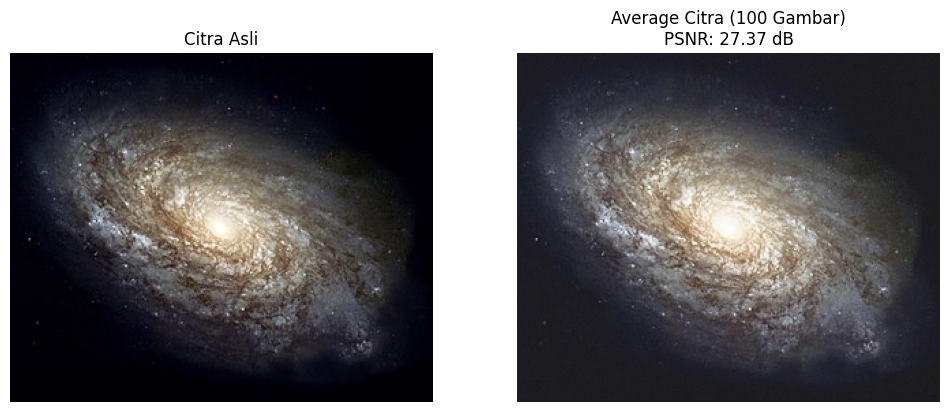

In [55]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv2.imread(img)
  cv_img.append(n)

original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Fungsi untuk menghitung PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr
# Menyimpan hasil PSNR dan citra untuk ditampilkan
psnr_results = {}

# Daftar jumlah citra yang akan digunakan
num_images_list = [5, 10, 20, 40, 80, 100]

# Menampilkan gambar rata-rata dan PSNR untuk masing-masing jumlah citra
for num_images in num_images_list:
    # Mengambil subset citra
    subset_images = cv_img[:num_images]

    # Inisialisasi citra denoised
    denoised_img = np.zeros(subset_images[0].shape, dtype=np.float32)

    # Menghitung rata-rata citra
    for i in range(num_images):
        denoised_img += subset_images[i].astype(np.float32)
    denoised_img /= num_images  # Menghitung rata-rata

    # Mengonversi kembali ke uint8
    denoised_img = np.clip(denoised_img, 0, 255)  # Pastikan nilai pixel dalam rentang 0-255
    denoised_img = np.uint8(denoised_img)

    # Menghitung PSNR
    psnr = calculate_psnr(original_image, denoised_img)

    # Menyimpan PSNR ke dalam dictionary
    psnr_results[num_images] = psnr

    # Menampilkan gambar asli dan rata-rata citra
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
    plt.title(f'Average Citra ({num_images} Gambar)\nPSNR: {psnr:.2f} dB')
    plt.axis('off')

    plt.show()

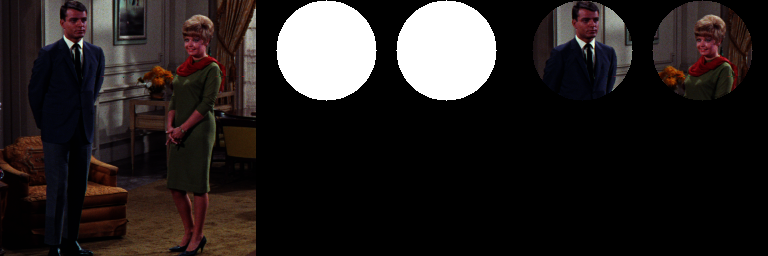

In [18]:
import matplotlib.pyplot as plt
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah

# Mengubah mask grayscale menjadi 3 channel agar dapat digabungkan dengan gambar berwarna
colored_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Menerapkan mask pada gambar asli
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([image, colored_mask, masked_image])

cv2_imshow(final_image)

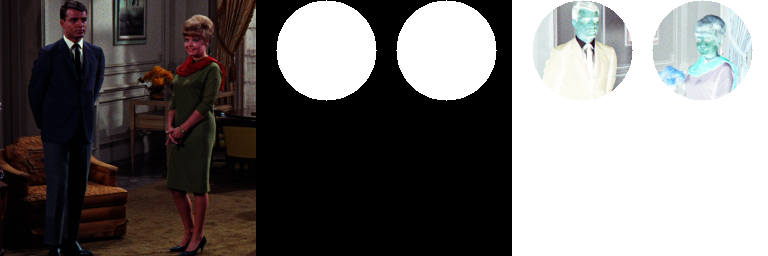

In [34]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah

# Menggunakan mask untuk membalik area yang ter-mask
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, image, 0)  # Area yang di-mask diisi dengan gambar asli, area lainnya dengan 0

# Melakukan operasi bitwise NOT
result_not = np.bitwise_not(masked_image)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([image, mask_3d, result_not])

cv2_imshow(final_image)

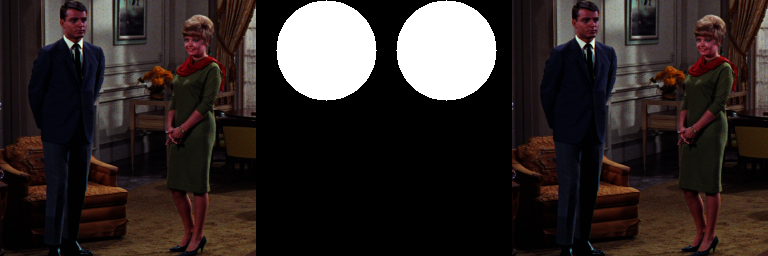

In [28]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah

# Menggunakan bitwise OR dengan mask
# Mengubah mask menjadi 3 channel agar sesuai dengan format gambar
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, image, 0)  # Area yang di-mask diisi dengan gambar asli, area lainnya dengan 0

# Menerapkan operasi bitwise OR
result_or = np.bitwise_or(image, masked_image)

final_image = np.hstack([image, mask_3d, result_or])

cv2_imshow(final_image)


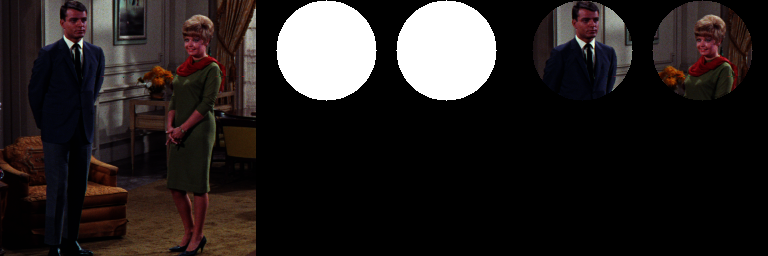

In [32]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah

# Menggunakan bitwise AND dengan mask
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, image, 0)  # Area yang di-mask diisi dengan gambar asli, area lainnya dengan 0

# Melakukan operasi bitwise AND
result_and = np.bitwise_and(image, masked_image)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([image, mask_3d, result_and])

cv2_imshow(final_image)

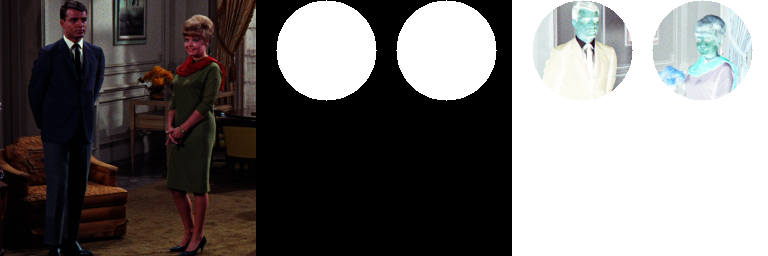

In [30]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah


# Menggunakan bitwise AND untuk mendapatkan area yang ter-mask
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, image, 0)  # Area yang di-mask diisi dengan gambar asli

# Menggunakan bitwise AND
result_and = np.bitwise_and(image, masked_image)

# Menggunakan bitwise NAND
result_nand = np.bitwise_not(result_and)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([image, mask_3d , result_nand])

cv2_imshow(final_image)

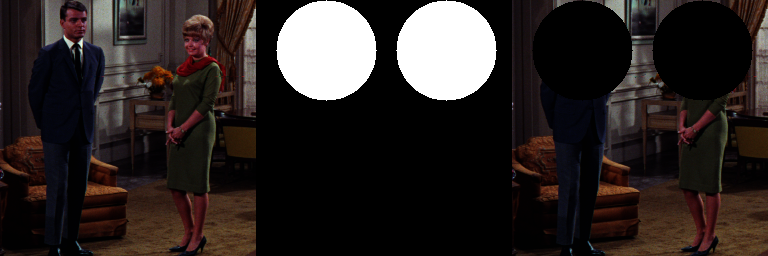

In [31]:
image = cv2.imread('/content/drive/MyDrive/PCVK/couple.png')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(image.shape[:2], dtype="uint8")

center_1 = (70,50)
center_2 = (190,50)

radius = 50
cv2.circle(mask, center_1, radius, 255, -1)  # Lingkaran pertama di kiri atas
cv2.circle(mask, center_2, radius, 255, -1)  # Lingkaran kedua di kanan bawah

# Menggunakan bitwise XOR dengan mask
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, image, 0)  # Area yang di-mask diisi dengan gambar asli, area lainnya dengan 0

# Melakukan operasi bitwise XOR
result_xor = np.bitwise_xor(image, masked_image)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([image, mask_3d, result_xor])

cv2_imshow(final_image)

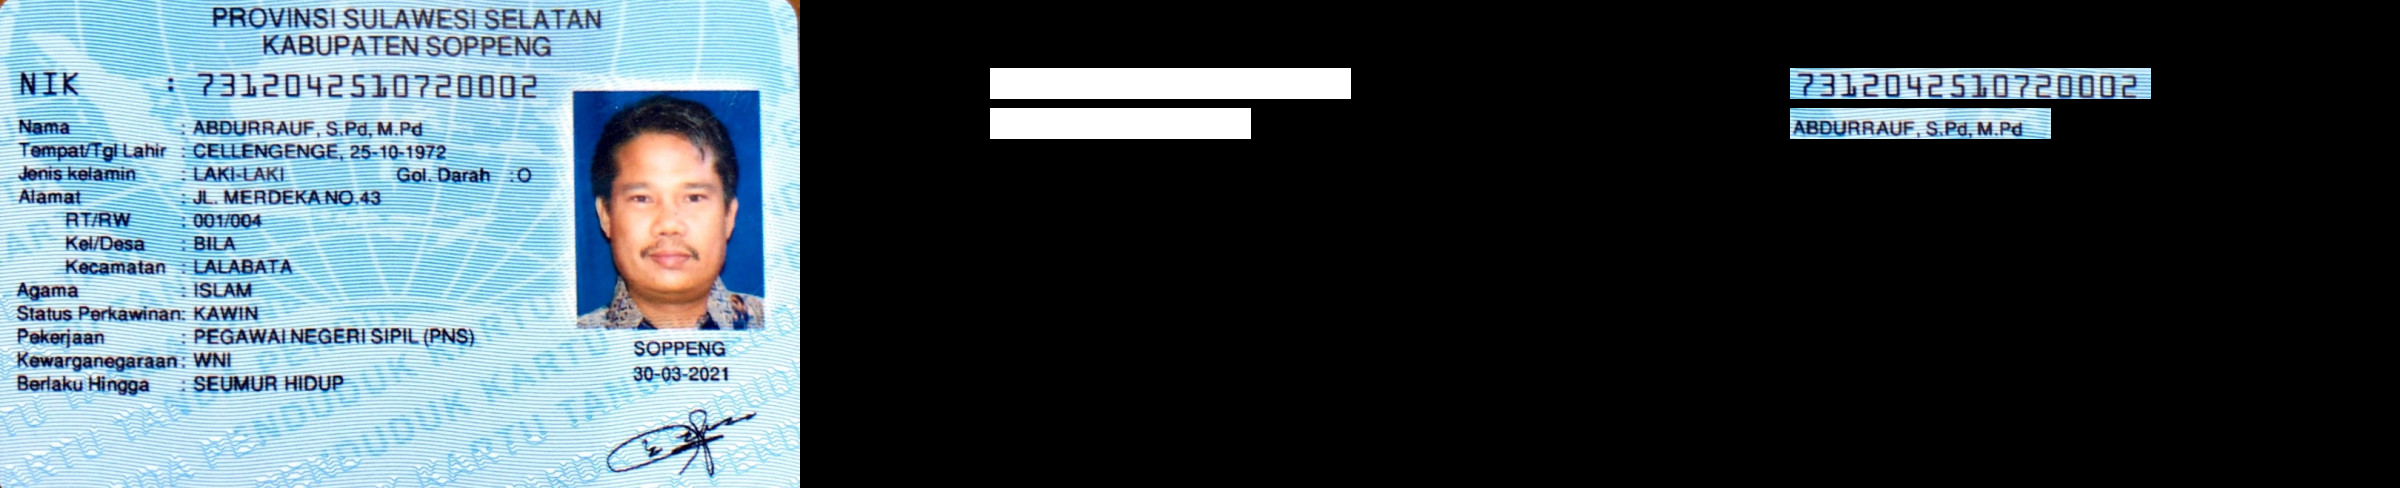

In [58]:
gambarKTP = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')

# Membuat mask hitam (0) dengan ukuran yang sama dengan gambar
mask = np.zeros(gambarKTP.shape[:2], dtype="uint8")

cv.rectangle(mask, pt1=(190, 68), pt2=(550, 98), color=(255, 255, 255), thickness=-1)
cv.rectangle(mask, pt1=(190, 108), pt2=(450, 138), color=(255, 255, 255), thickness=-1)

# Menggunakan bitwise AND dengan mask
mask_3d = np.stack([mask] * 3, axis=-1)  # Membuat 3 channel dari mask
masked_image = np.where(mask_3d == 255, gambarKTP, 0)  # Area yang di-mask diisi dengan gambar asli, area lainnya dengan 0

# Melakukan operasi bitwise AND
result_and = np.bitwise_and(gambarKTP, masked_image)

# Menggabungkan gambar asli, mask, dan gambar yang sudah di-mask
final_image = np.hstack([gambarKTP, mask_3d, result_and])

cv2_imshow(final_image)